In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv('toys_and_games_year_2022.csv')

# Step 1: Define date range and filter data
start_date = '01-01-2022'
end_date = '12-31-2022'
combined_df_2022['date'] = pd.to_datetime(combined_df_2022['date'])
filtered_df = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]



  0%|          | 0/2046193 [00:00<?, ?it/s]

C:\Users\savav\AppData\Local\Temp\ipykernel_12428\1363042273.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sentiment = filtered_df.groupby('week_start_date').mean().reset_index()


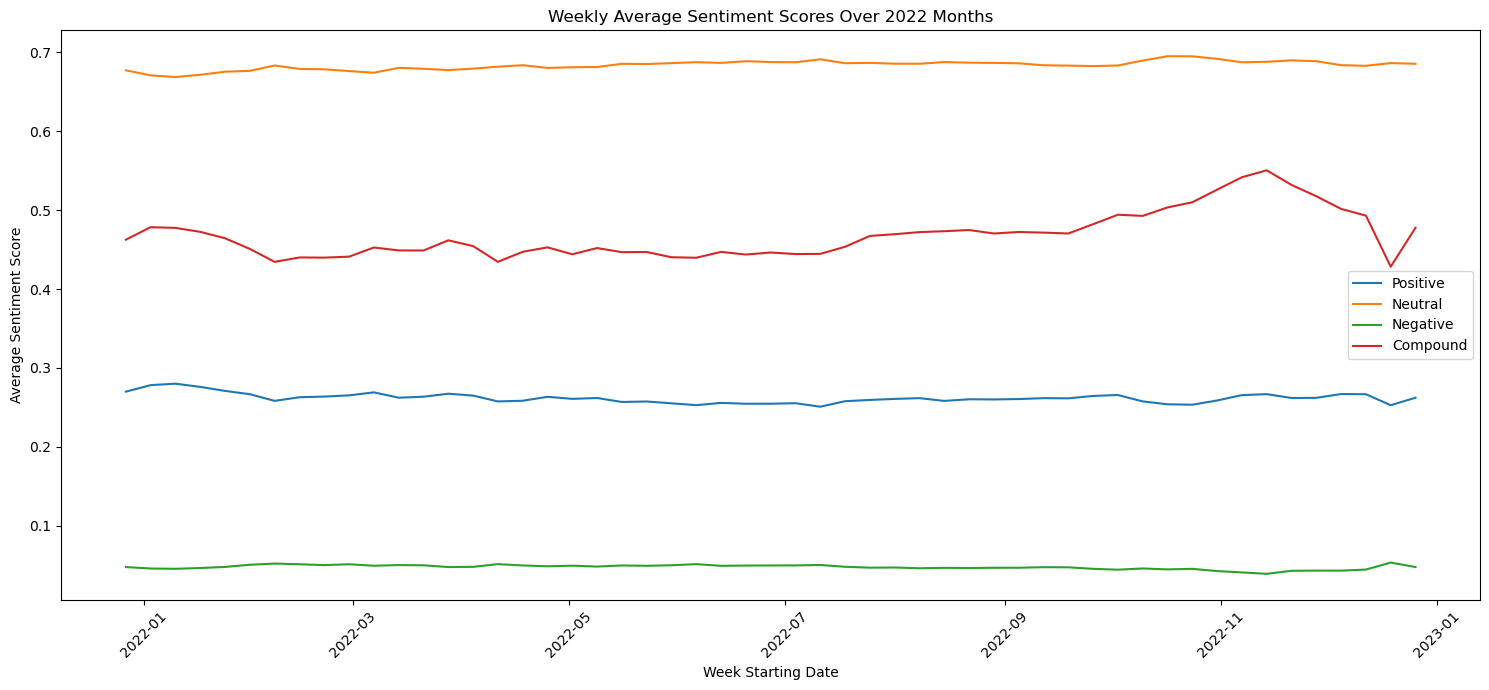

In [2]:
# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))

# Step 4: Aggregate sentiment scores week by week
weekly_sentiment = filtered_df.groupby('week_start_date').mean().reset_index()

# Step 5: Visualize the results
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='pos', label='Positive')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='neu', label='Neutral')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='neg', label='Negative')
sns.lineplot(data=weekly_sentiment, x='week_start_date', y='compound', label='Compound')
plt.title('Weekly Average Sentiment Scores Over 2022 Months')
plt.xlabel('Week Starting Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()